# A Study of  Crimes in Phoenix, AZ, based on zip Codes and type, and why you should keep your A#% at home


#### data set can be found at https://www.phoenix.gov/opendata

#### My first Question, What Zip Codes have the most crime?(Where da 'hood, where da 'hood, where da 'hood at?)
#### My second question, What crimes are the most prevalent in which months of the year?
#### My third question, What days of the week are crimes most prevalent? 
#### My fourth question, Based on these, what days, months are you most likely to have certain crimes happen?

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
try:
    # module exists
    import seaborn as sns
    seaborn_exists = True
except ImportError:
    # module doesn't exist
    seaborn_exists = True


%matplotlib inline

# custom features of plots
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Helvetica Neue'
plt.rcParams['font.monospace'] = 'Helvetica Neue'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 12

In [3]:
df = pd.read_csv('./data/cleaneddataset.csv')

In [5]:
# due to how the names were done, I decided to go ahead and change the names to comething a bit moee paletable
crimemap = {
    'MOTOR VEHICLE THEFT': 'VEHICLE THEFT',
    'LARCENY-THEFT': 'LARCENY THEFT',
    'MURDER AND NON-NEGLIGENT MANSLAUGHTER' : 'MURDER',
    'AGGRAVATED ASSAULT': 'ASSAULT'
    }
df['crime'].replace(crimemap, inplace=True)

## Zip Codes With Safety Issues(Places where "huggin' the block" ain't safe).
My neighboorhood has a zipcode of 85339 (Laveen,AZ a farm community turned suburbs and one of the safest, therefore not on the list)

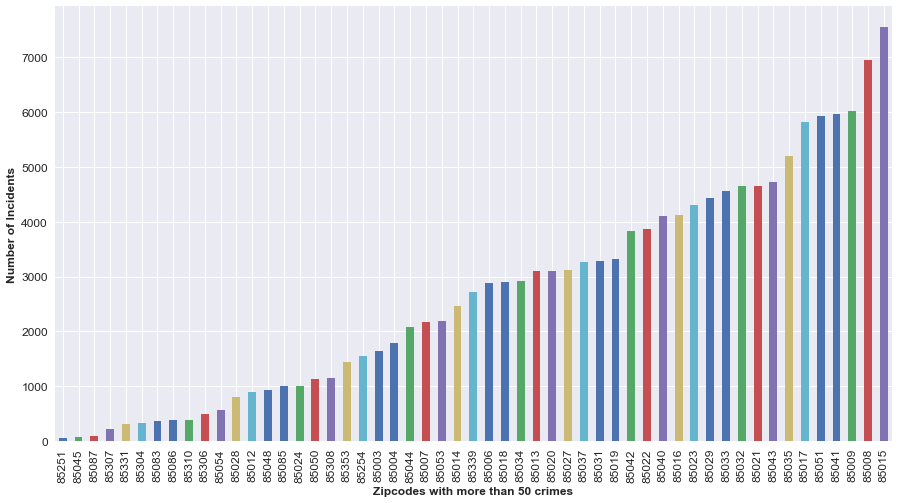

In [4]:
cutoff = 50
plt.figure(figsize=(15,8))
sd = df['zip'].value_counts(sort=True,ascending=True)
sd.index = sd.index.astype(int)
sd = sd[~(sd<cutoff)]
ax = sd.plot.bar()
ax.set_ylabel('Number of Incidents')
ax.set_xlabel('Zipcodes with more than '+str(cutoff)+' crimes')
plt.show()

## Monthly Crime Statistics( in YYYY, MM) format


### All crime statstics are broken up by the crime type 

/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py:35: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


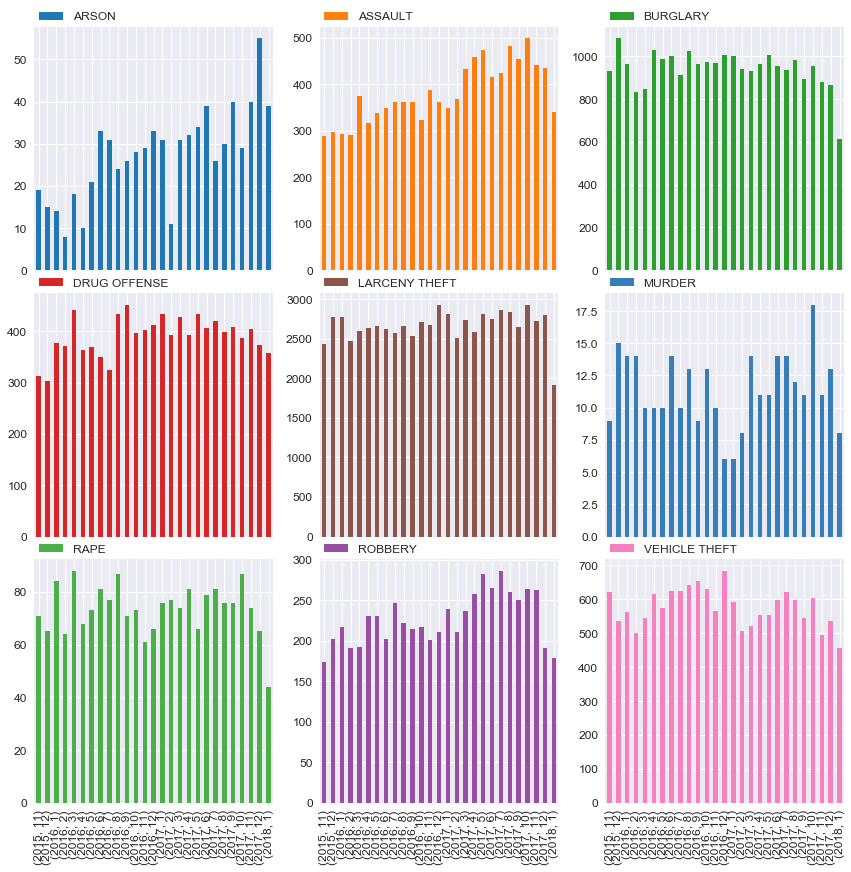

In [5]:
crime_year = pd.crosstab([df['year'],df['month']],df['crime'])



# Types of collors needed to plot correctly
color_sequence = ['#1f77b4', '#ff7f0e', '#2ca02c','#d62728','#8c564b',
                  '#377eb8','#4daf4a','#984ea3','#f781bf']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,12), sharex=True)
k=0
for i in range(0,3):
    for j in range(0,3):
        ax = axes[i,j]
        # selec kth columns
        crime_year_col = crime_year.ix[:,k]
        #plot the data with a selected color
        crime_year_col.plot(kind='bar', ax=ax, color=color_sequence[k])
        ax.legend(loc = (0,1))
        # rotate the x-axis ticks
        ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
        ax.set_xlabel('')
        k+=1
plt.tight_layout()
plt.show(fig)

# More crime...That's not Alan's fashion sense

## Crime by Month and Year
### Sorry about the closeness of the indexes

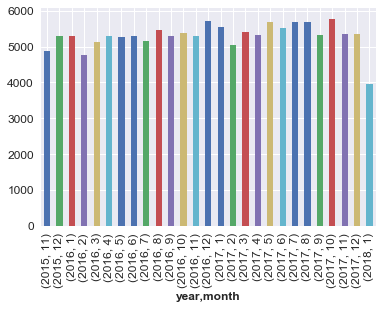

In [8]:
df.groupby(['year','month'])['crime'].count().plot(kind='bar')
plt.show()

## Crime based on the day of the week



| Crime | Highest | Lowest |
| --- | --- | --- |
| ARSON | Saturday (59) | Tuesday (27) |
| ASSAULT | Sunday (801) | Wednesday (636) |
| BURGLARY | Friday (2274) | Sunday (1383) |
| DRUG OFFENSE | Wednesday (1029) | Sunday (411) |
| LARCENY THEFT | Friday (5424) | Sunday (4655) |
| MURDER | Sunday (28) | Wednesday (15) |
| RAPE | Saturday (155) | Thursday (118) |
| ROBBERY | Wednesday (465) | Thursday (394) |
| VEHICLE THEFT | Friday (1221) | Thursday (1115) |


### Heatmap of crime by date and type of offense


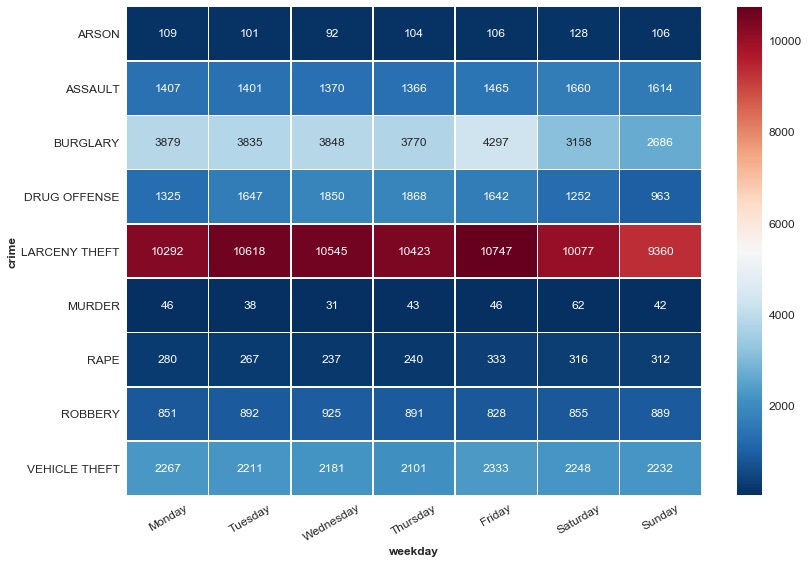

In [9]:
crime_weekday = pd.crosstab(df['weekday'],df['crime'])
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8), sharex=True)
if seaborn_exists:
    daysOfWeekList = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    crime_weekday=crime_weekday.reindex(daysOfWeekList)
    ax=sns.heatmap(crime_weekday.T,annot=True, fmt="d",linewidths=0.5,cmap='RdBu_r')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
    plt.tight_layout()
    plt.savefig('heatmap.png')
    plt.show()

# Crime at highest and lowest point based on the day the crime usually happens (No it doesn't "Go up on a Tuesday")

| Crime | Highest | Lowest |
| --- | --- | --- |
| ARSON | Saturday (128) | Wednesday (92) |
| ASSAULT | Saturday (1660) | Thursday (1366) |
| BURGLARY | Friday (4297) | Sunday (2686) |
| DRUG OFFENSE | Thursday (1868) | Sunday (963) |
| LARCENY THEFT | Friday (10747) | Sunday (9360) |
| MURDER | Saturday (62) | Wednesday (31) |


/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


| RAPE | Friday (333) | Wednesday (237) |
| ROBBERY | Wednesday (925) | Friday (828) |
| VEHICLE THEFT | Friday (2333) | Thursday (2101) |


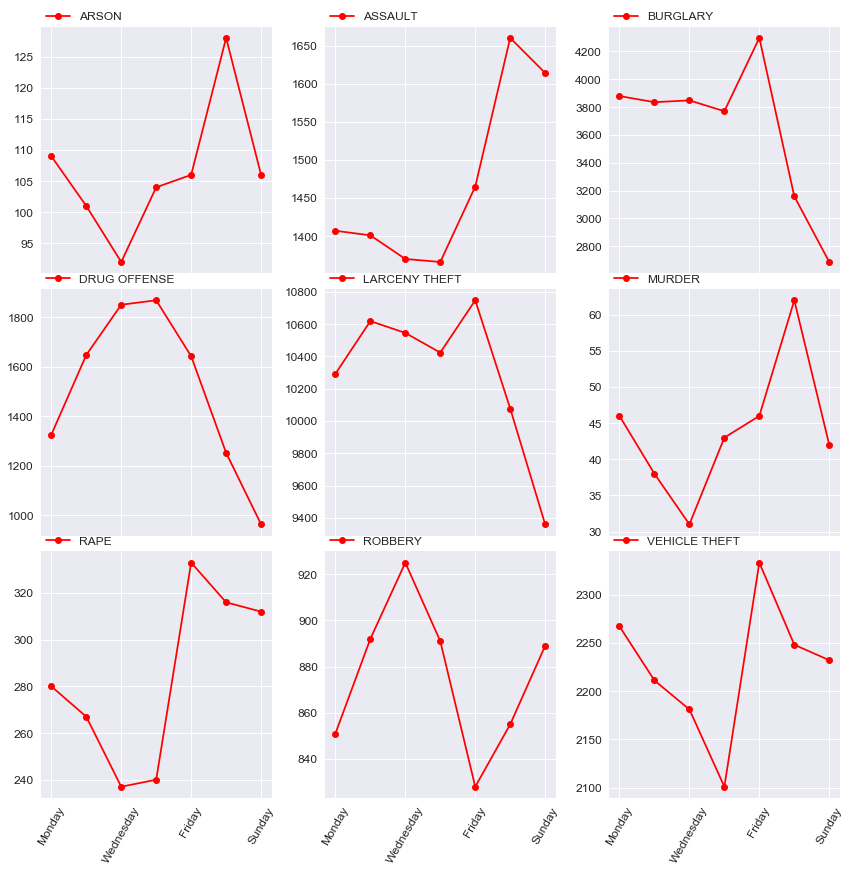

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(12,12),sharex=True)

print ('| Crime | Highest | Lowest |')
print ('| --- | --- | --- |')
k=0
for i in range(0,3):
    for j in range(0,3):
        ax = axes[i,j]
        # selec kth columns
        crime_weakday_col = crime_weekday.ix[:,k]
        
        crime_name = crime_weakday_col.name
        crime_max_label,crime_max_val = crime_weakday_col.idxmax(), crime_weakday_col.max()
        crime_min_label,crime_min_val = crime_weakday_col.idxmin(), crime_weakday_col.min()
        print ('| {} | {} ({}) | {} ({}) |'.format(crime_name,crime_max_label,crime_max_val,crime_min_label,crime_min_val))
        
        crime_weakday_col.plot(kind='line',ax=ax,color='r',marker='o')
        #crime_weakday_col.plot(kind='bar',ax=ax,color='r')
        ax.legend(loc = (0,1))
        ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
        ax.set_xlabel('')
        k+=1
plt.tight_layout()
plt.show(fig)